In [1]:
import os
from collections import Counter
from pathlib import Path

import altair as alt
import pandas as pd
import numpy as np
import scipy
import scanpy as sc
import seaborn as sns
import umap
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler


import mgitools.os_helpers as os_helpers

from pollock.models.model import predict_from_anndata, embed_from_anndata
from pollock.models.explain import explain_predictions

In [2]:
def incorporate_predictions(adata, model_fp):
    preds = predict_from_anndata(adata, model_fp)
    emb = embed_from_anndata(adata, model_fp)

    adata.obs = pd.concat((adata.obs, preds), axis=1)
    adata.obsm['pollock_embedding'] = emb.values
    adata.obsm['pollock_umap'] = umap.UMAP().fit_transform(StandardScaler().fit_transform(emb.values))
    
    return adata

In [3]:
processed = sc.read_h5ad('/home/estorrs/data/single_cell_classification/aadel_pdac/all_processed.h5ad')
processed

AnnData object with n_obs × n_vars = 33912 × 2999
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'type', 'leiden', 'cell_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colo

In [4]:
raw_counts = sc.read_h5ad('/home/estorrs/data/single_cell_classification/aadel_pdac/raw_counts.h5ad')
raw_counts

AnnData object with n_obs × n_vars = 19331528 × 22164
    obs: 'sample_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9'

In [7]:
filtered = raw_counts[processed.obs.index]
filtered

View of AnnData object with n_obs × n_vars = 33912 × 22164
    obs: 'sample_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9'

In [8]:
adata = incorporate_predictions(filtered, '../benchmarking/results/11302020_teir1/scRNAseq/pdac/pollock_module/')
adata

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-12-10 11:18:35,750 8543 genes in training set are missing from prediction set
2020-12-10 11:18:37,354 starting batch 1 of 4
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-12-10 11:18:37,557 8543 genes in training set are missing from prediction set
2020-12-10 11:19:07,342 starting batch 2 of 4
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-12-10 11:19:07,888 8543 genes in training set are missing from prediction set
2020-12-10 11:19:35,330 starting batch 3 of 4
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
2020-12-10 11:19:35,629 8543 genes in training set are missing from prediction set
2020-12-10 11:20:08,127 starting batch 4 of 4
is_categorical is deprecated and will be removed in a future version

AnnData object with n_obs × n_vars = 33912 × 22164
    obs: 'sample_id', 'batch', 'predicted_cell_type', 'cell_type_probability', 'probability_Acinar', 'probability_B cell', 'probability_CD4 T cell', 'probability_CD8 T cell', 'probability_Dendritic', 'probability_Endothelial', 'probability_Epithelial', 'probability_Erythrocyte', 'probability_Fibroblast', 'probability_Islet', 'probability_Malignant', 'probability_Mast', 'probability_Monocyte', 'probability_NK', 'probability_Plasma', 'probability_Treg', 'probability_Tuft'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene

In [9]:
processed.obs = pd.merge(processed.obs, adata.obs, left_index=True, right_index=True)
processed.obsm['pollock_embedding'] = adata.obsm['pollock_embedding']
processed.obsm['pollock_umap'] = adata.obsm['pollock_umap']

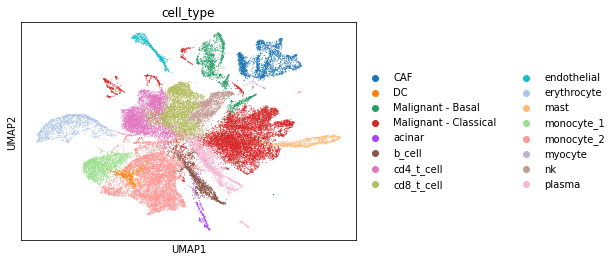

In [13]:
sc.pl.umap(processed, color=['cell_type'])

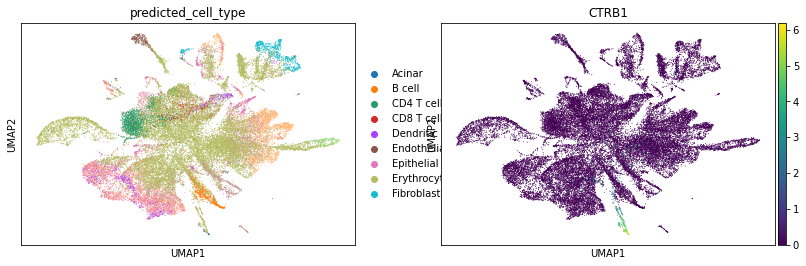

In [22]:
sc.pl.umap(processed, color=['predicted_cell_type', 'CTRB1'])

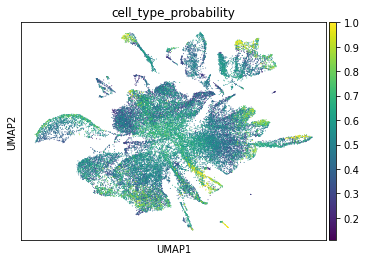

In [15]:
sc.pl.umap(processed, color=['cell_type_probability'])

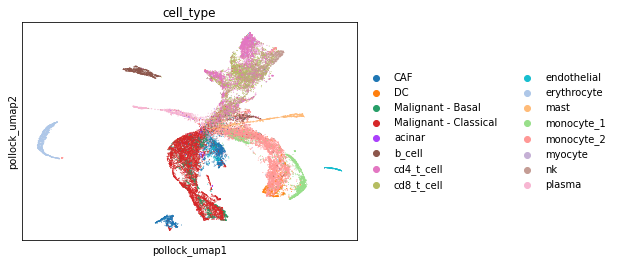

In [17]:
sc.pl.embedding(processed, basis='pollock_umap',
                color=['cell_type'])

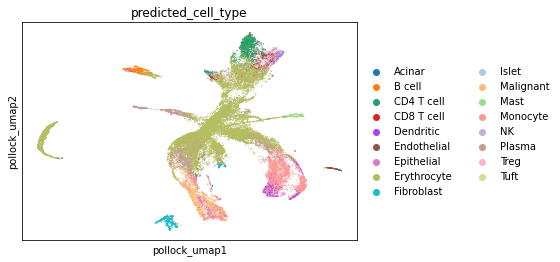

In [18]:
sc.pl.embedding(processed, basis='pollock_umap',
                color=['predicted_cell_type'])

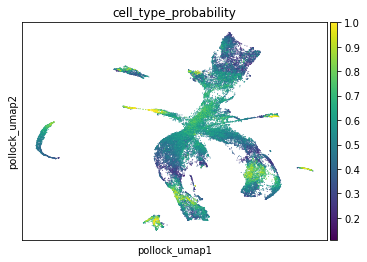

In [19]:
sc.pl.embedding(processed, basis='pollock_umap',
                color=['cell_type_probability'])

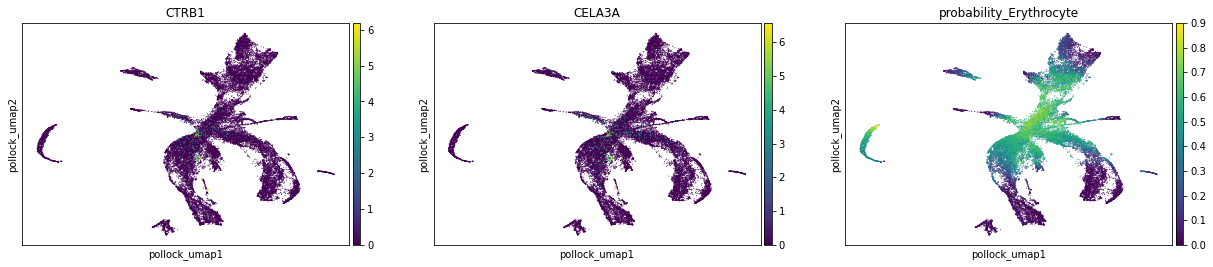

In [23]:
sc.pl.embedding(processed, basis='pollock_umap',
                color=['CTRB1', 'CELA3A', 'probability_Erythrocyte'])

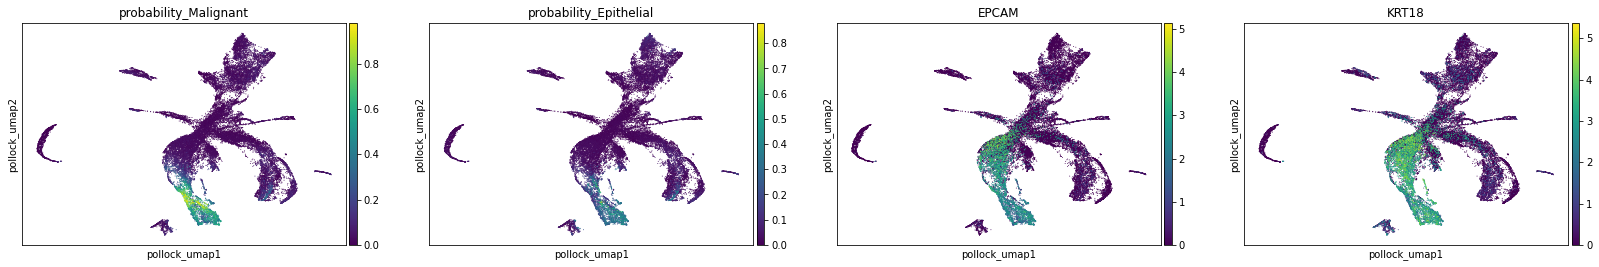

In [25]:
sc.pl.embedding(processed, basis='pollock_umap',
                color=['probability_Malignant', 'probability_Epithelial', 'EPCAM', 'KRT18'])

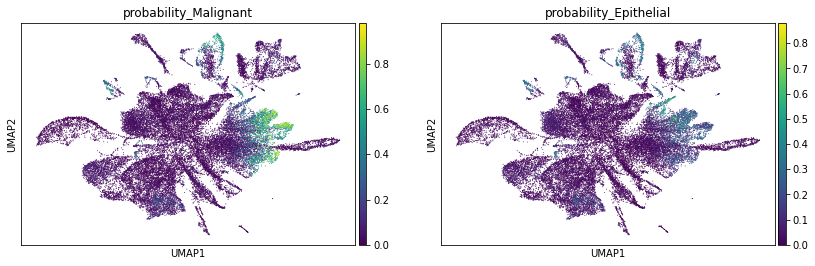

In [27]:
sc.pl.umap(processed,
                color=['probability_Malignant', 'probability_Epithelial'])